Importing Libs

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [79]:
df = pd.read_csv('diabetes.csv')

In [80]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [81]:
df.shape

(768, 9)

Plotting Each Category with Respect to Diabetes Diag

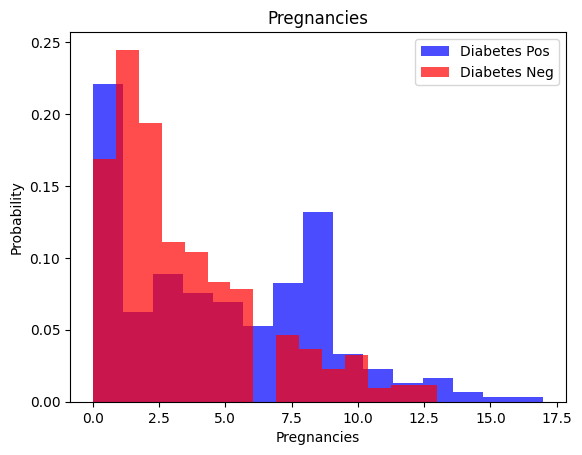

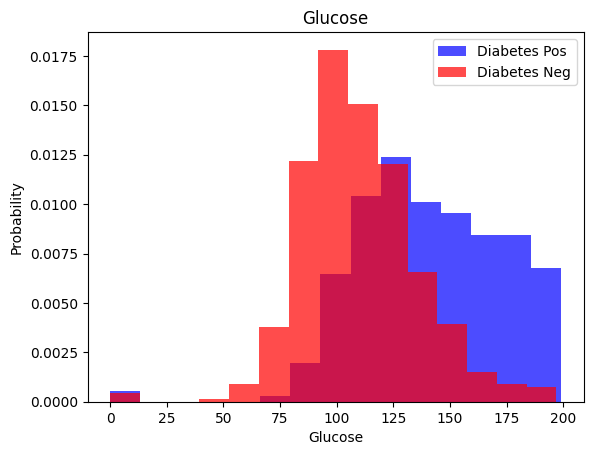

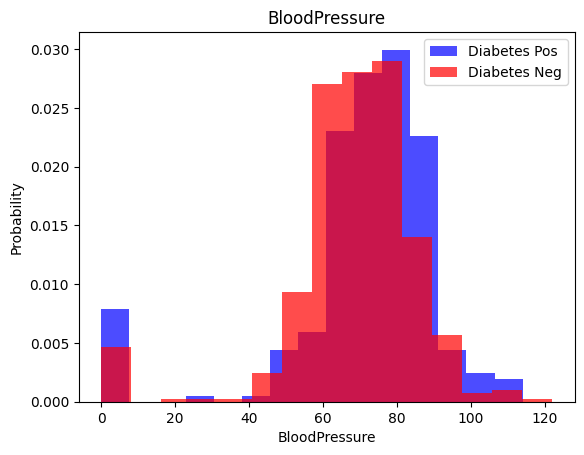

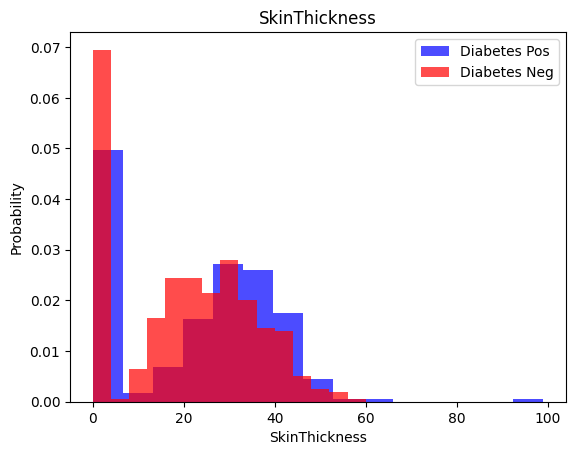

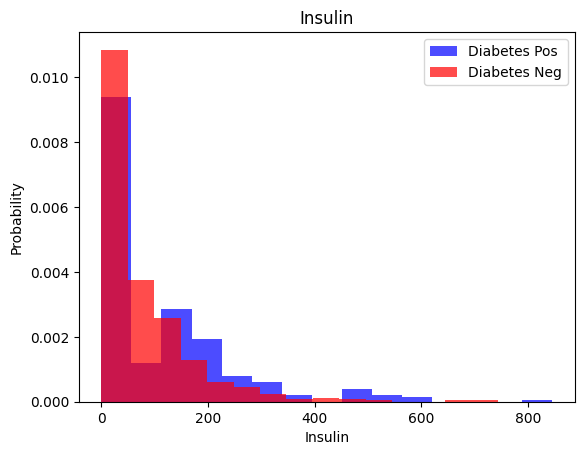

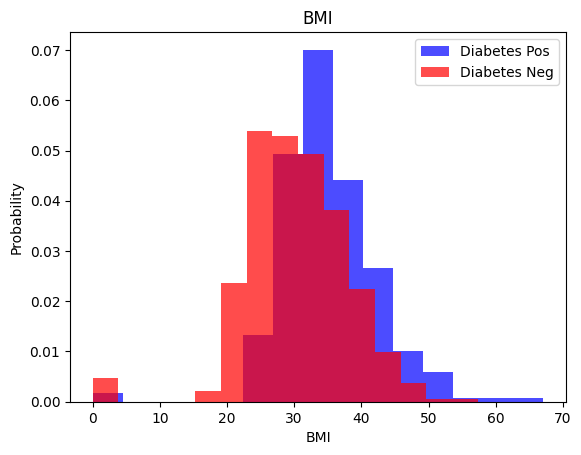

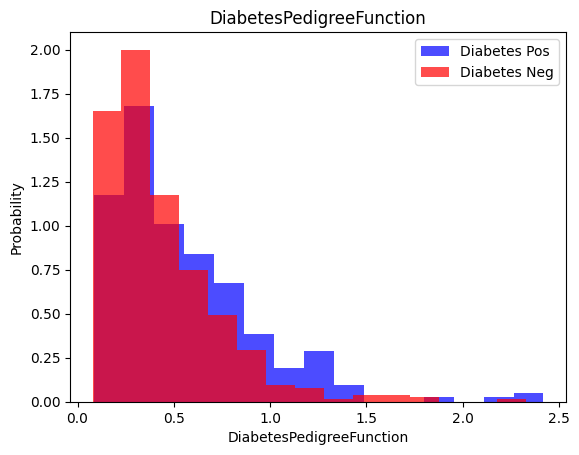

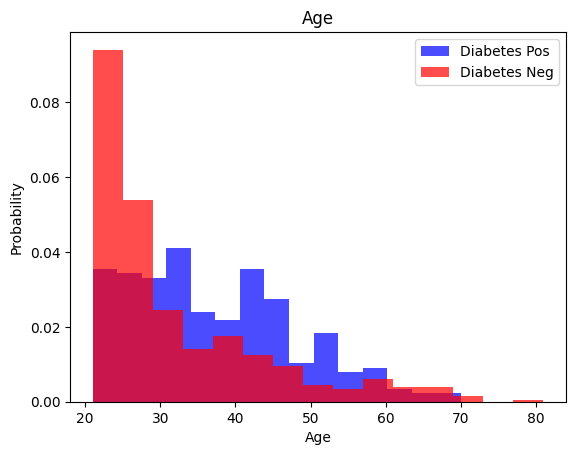

In [82]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label],color='blue', label='Diabetes Pos', alpha = 0.7, density=True, bins=15)
    plt.hist(df[df['Outcome']==0][label],color='red', label='Diabetes Neg', alpha = 0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()
    
    

Splitting Data into x and y for training models

In [83]:
x = df[df.columns[:-1]].values

y = df[df.columns[-1]].values

In [84]:
x.shape, y.shape

((768, 8), (768,))

In [85]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [86]:
import sklearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


In [90]:
over = RandomOverSampler()
x,y = over.fit_resample(x,y)
data = np.hstack((x, np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [92]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [93]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [95]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [96]:
model.evaluate(x_train,y_train)

19/19 [==============================] - 0s 512us/step - loss: 0.6828 - accuracy: 0.5517


[0.682811975479126, 0.5516666769981384]

In [97]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.5933 - val_loss: 0.6361 - val_accuracy: 0.6700
Epoch 2/20
38/38 [==============================] - 0s 976us/step - loss: 0.6226 - accuracy: 0.6650 - val_loss: 0.5991 - val_accuracy: 0.7100
Epoch 3/20
38/38 [==============================] - 0s 897us/step - loss: 0.5898 - accuracy: 0.6933 - val_loss: 0.5644 - val_accuracy: 0.7400
Epoch 4/20
38/38 [==============================] - 0s 920us/step - loss: 0.5621 - accuracy: 0.7133 - val_loss: 0.5352 - val_accuracy: 0.7500
Epoch 5/20
38/38 [==============================] - 0s 933us/step - loss: 0.5404 - accuracy: 0.7250 - val_loss: 0.5135 - val_accuracy: 0.7700
Epoch 6/20
38/38 [==============================] - 0s 850us/step - loss: 0.5232 - accuracy: 0.7350 - val_loss: 0.4979 - val_accuracy: 0.7700
Epoch 7/20
38/38 [==============================] - 0s 845us/step - loss: 0.5108 - accuracy: 0.7550 - val_loss: 0.4855 - val_accuracy: 0.7700
Epoch 8/

In [98]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 556us/step - loss: 0.4779 - accuracy: 0.7900


[0.4779311418533325, 0.7900000214576721]